In [1]:
import os
import re
import glob

import h5py

import numpy as np

from scipy import signal

import skimage

import pickle

import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import matplotlib as mpl
import matplotlib.cm as mpl_cm
import matplotlib.colors as mpl_colors
import matplotlib.offsetbox as mpl_offsetbox
import matplotlib.gridspec as mpl_gridspec

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# change font
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "Arial"
# mpl.rcParams.update({'font.size': 6.5})
mpl.rcParams.update({'font.size': 8})

print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.sans-serif'])
print(mpl.rcParams['font.size'])

['Arial']
['Arial']
8.0


In [2]:
# Save progress
HISTORY_FILEPATH = r"\\10.254.8.27\JILAB3-Quota\Jian\Backup\JupyterNotebookBackup\JEDI2P_NeuropilTrace_FFTs.py"
LAST_SAVE_TIME = 0
SAVE_INTERVAL_S = 15*60
def SAVE_PROGRESS(dst_file_path):
    global LAST_SAVE_TIME, SAVE_INTERVAL_S
    import time
    cur_time = time.time()
    if (cur_time - LAST_SAVE_TIME) < SAVE_INTERVAL_S:
        print(f"Time since last sync = {(cur_time - LAST_SAVE_TIME):0.2f} s" )
        return
    LAST_SAVE_TIME = cur_time
    try:
        from datetime import datetime
        dst_dir_path, dst_file_name = os.path.split(dst_file_path)
        dst_file_name = os.path.splitext(dst_file_name)[0] + "_" + datetime.today().strftime('%Y-%m-%d') + os.path.splitext(dst_file_name)[1]
        dst_file_path = os.path.join(dst_dir_path, dst_file_name)
        if not os.path.isdir(dst_dir_path):
            os.makedirs(dst_dir_path)
        if os.path.exists(dst_file_path):
            os.remove(dst_file_path)
        %history -t -g -f $dst_file_path
        dst_notebook_path = os.path.splitext(dst_file_path)[0] + ".ipynb"
        %notebook $dst_notebook_path
        print("Progress saved to: " + dst_file_path)
    except Exception as e:
        print("Progress sync failed, error: ",e)

In [3]:
# display configuration

my_monitor_dpi_px = 96
illustrator_mointor_dpi_px = 72
letter_paper_size_inch = np.array((8.5, 11))

full_page_figure_illustrator_size_pxls = np.array([521, 655])
full_page_paper_illustrator_size_pxls = np.array([620, 801])
paper_to_illustrator_ratio = full_page_figure_illustrator_size_pxls/full_page_paper_illustrator_size_pxls

plot_panel_label_font_size = 8
plot_axis_label_font_size = 7
plot_numeric_label_font_size = 6.5

SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: \\10.254.8.27\JILAB3-Quota\Jian\Backup\JupyterNotebookBackup\JEDI2P_NeuropilTrace_FFTs_2024-05-24.py


In [29]:
src_hdf5_file_path = r"F:\2023-08-31\M375_JEDI2P\FOV01\Group03\bkg_traces\data\bkg_traces.hdf5"


dst_dir_path = os.path.split(src_hdf5_file_path)[0]
dst_plot_subdir_name = "ffts_plots"

SAVE_PROGRESS(HISTORY_FILEPATH)  

Progress saved to: \\10.254.8.27\JILAB3-Quota\Jian\Backup\JupyterNotebookBackup\JEDI2P_NeuropilTrace_FFTs_2024-05-28.py


In [30]:
time_per_frame_ms = None
ms_to_s = None
s_to_ms = None
fs = None

mean_traces = None
mean_F0s = None
mean_dFFs = None

with h5py.File(src_hdf5_file_path, "r") as hdf5_file:
    # print(hdf5_file["src_data_file_paths"][()])
    time_per_frame_ms = hdf5_file["time_per_frame_ms"][()]
    ms_to_s = hdf5_file["ms_to_s"][()]
    s_to_ms = hdf5_file["s_to_ms"][()]
    fs = hdf5_file["fs"][()]
    mean_traces = hdf5_file["mean_traces"][()]
    mean_F0s = hdf5_file["mean_F0s"][()]
    mean_dFFs = hdf5_file["mean_dFFs"][()]

print(mean_traces.shape)

SAVE_PROGRESS(HISTORY_FILEPATH)  

(16, 37, 3100)
Time since last sync = 13.76 s


In [31]:
mean_dff_ffts = np.fft.fft(mean_dFFs, axis = -1)
mean_dff_fft_freq = np.fft.fftfreq(n = mean_dFFs.shape[-1], d = ms_to_s * time_per_frame_ms)

SAVE_PROGRESS(HISTORY_FILEPATH)  

Time since last sync = 13.82 s


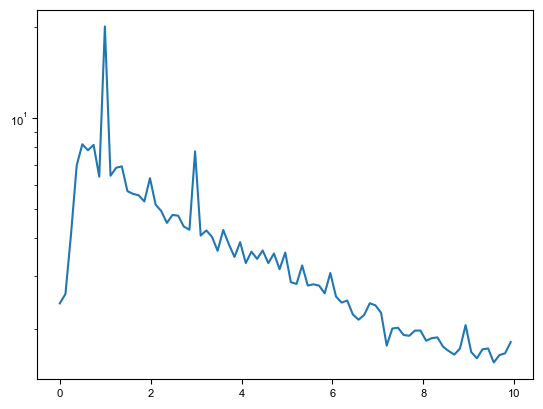

Time since last sync = 14.02 s


In [32]:
check_idx = 4
check_freq_range = [0,10]

check_fft_freq = mean_dff_fft_freq
# check_fft_amp = np.mean(np.abs(mean_dff_ffts[check_idx,:,:]), axis = 0)
check_fft_amp = np.mean(np.abs(mean_dff_ffts[:,:,:]), axis = (0,1))


check_freq_mask = np.logical_and(check_fft_freq >= check_freq_range[0], 
                                 check_fft_freq <= check_freq_range[1])

plt.figure()
plt.plot(check_fft_freq[check_freq_mask], check_fft_amp[check_freq_mask])
plt.yscale("log")
plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)

In [33]:
# save data

dst_hdf5_file_name = "fft_res.hdf5"
dst_hdf5_file_path = os.path.join(dst_dir_path, dst_hdf5_file_name)

with h5py.File(dst_hdf5_file_path, "w") as hdf5_file:
    hdf5_file.create_dataset("src_hdf5_file_path", data = src_hdf5_file_path)
    hdf5_file.create_dataset("time_per_frame_ms", data = time_per_frame_ms)
    hdf5_file.create_dataset("ms_to_s", data = ms_to_s)
    hdf5_file.create_dataset("s_to_ms", data = s_to_ms)
    hdf5_file.create_dataset("fs", data = fs)
    hdf5_file.create_dataset("mean_traces", data = mean_traces)
    hdf5_file.create_dataset("mean_F0s", data = mean_F0s)
    hdf5_file.create_dataset("mean_dFFs", data = mean_dFFs)
    hdf5_file.create_dataset("mean_dff_ffts", data = mean_dff_ffts)
    hdf5_file.create_dataset("mean_dff_fft_freq", data = mean_dff_fft_freq)

print("result data file saved to: " + dst_hdf5_file_path)

dst_notebook_file_name = "fft_res.ipynb"
dst_notebook_file_path = os.path.join(dst_dir_path, dst_notebook_file_name)
%notebook $dst_notebook_file_path

SAVE_PROGRESS(HISTORY_FILEPATH)  

result data file saved to: F:\2023-08-31\M375_JEDI2P\FOV01\Group03\bkg_traces\data\fft_res.hdf5
Time since last sync = 17.98 s


In [34]:
# create dst directory

dst_plot_subdir_path = os.path.join(dst_dir_path, dst_plot_subdir_name)

if not os.path.isdir(dst_plot_subdir_path):
    os.makedirs(dst_plot_subdir_path)

print(dst_plot_subdir_path)

SAVE_PROGRESS(HISTORY_FILEPATH)

F:\2023-08-31\M375_JEDI2P\FOV01\Group03\bkg_traces\data\ffts_plots
Time since last sync = 18.64 s


(16, 3100)


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


pickle dump to: F:\2023-08-31\M375_JEDI2P\FOV01\Group03\bkg_traces\data\ffts_plots\bkg_trace_fft.pickle
plot saved to: F:\2023-08-31\M375_JEDI2P\FOV01\Group03\bkg_traces\data\ffts_plots\bkg_trace_fft.pdf


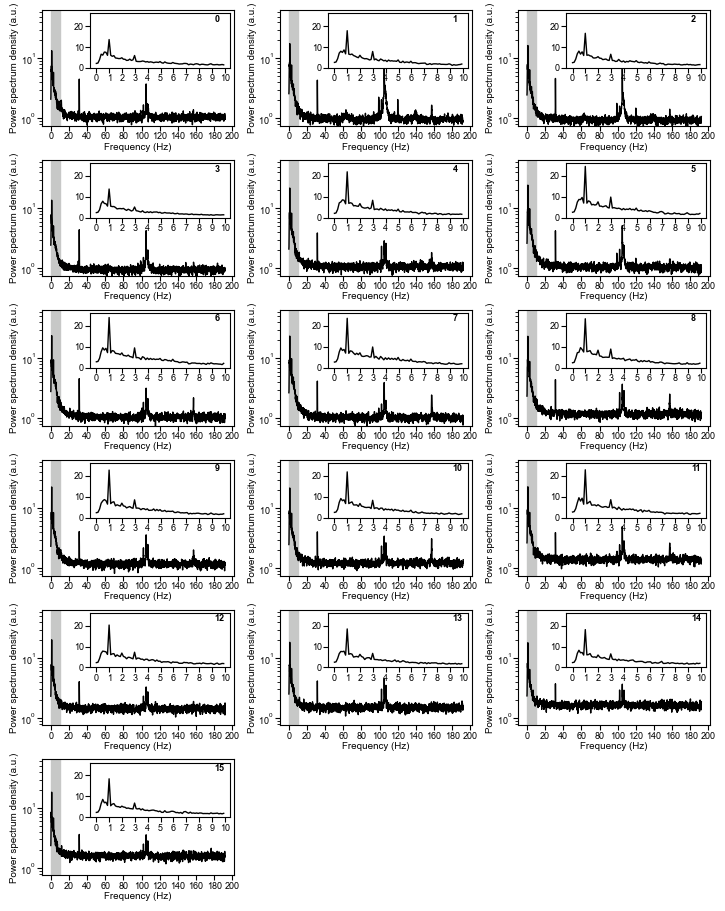

Time since last sync = 161.47 s


In [38]:
## make nice plot

plot_fft_freq = mean_dff_fft_freq
plot_fft_traces =np.mean(np.abs(mean_dff_ffts), axis = 1)

print(plot_fft_traces.shape)

plot_ylim = [0.75, 65]
# plot_inset_ylim = [0,35] 
# plot_inset_ylim = [0,18] 
# plot_inset_ylim = [0,14] 
plot_inset_ylim = [0,26] 

plot_x_range = [0, 200]

plot_x_ticks = np.arange(plot_x_range[0], plot_x_range[-1] + 1, 20)
plot_x_ticklabels = plot_x_ticks

plot_zoom_x_range = [0,10]

plot_zoom_inset_x0 = 0.25
plot_zoom_inset_y0 = 0.5
plot_zoom_inset_width = 0.98 - plot_zoom_inset_x0
plot_zoom_inset_height = 0.97 - plot_zoom_inset_y0

plot_zoom_x_ticks = np.arange(plot_zoom_x_range[0], plot_zoom_x_range[-1] + 1, 1)
plot_zoom_x_ticklabels = plot_zoom_x_ticks

plot_nof_cols = 6
plot_nof_rows = 3

fig_width = letter_paper_size_inch[0] * paper_to_illustrator_ratio[0] 
fig_height = letter_paper_size_inch[1] * paper_to_illustrator_ratio[1] 

dst_figure_name = f"bkg_trace_fft"
dst_png_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".png")
dst_eps_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".eps")
dst_pdf_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".pdf")
dst_pkl_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".pickle")
dst_hdf5_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".hdf5")
dst_notebook_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".ipynb")

fig = plt.figure(
    figsize = (fig_width,fig_height),
    constrained_layout = True,
)

fig_gs = mpl_gridspec.GridSpec(plot_nof_cols, plot_nof_rows, figure = fig)
for i_col in range(plot_nof_cols):
    for i_row in range(plot_nof_rows):
        cur_trace_idx = i_col * plot_nof_rows + i_row
        if cur_trace_idx >= plot_fft_traces.shape[0]:
            continue
        plot_ax = plt.subplot(fig_gs[i_col, i_row])

        cur_plot_trace = plot_fft_traces[cur_trace_idx,:]

        plot_mask = np.logical_and(plot_fft_freq >= plot_x_range[0], plot_fft_freq <= plot_x_range[1])
        plot_ax.plot(plot_fft_freq[plot_mask], 
                 cur_plot_trace[plot_mask],
                 color = "black",
                 linewidth = 1,
                 zorder = 1,
                )
        plot_ax.axvspan(
            xmin = plot_zoom_x_range[0],
            xmax = plot_zoom_x_range[1],
            color = "#c7c8c7",
            zorder = 0)
        plt.ylim(plot_ylim)

        plt.xticks(
            ticks = plot_x_ticks,
            labels = plot_x_ticklabels)
        plt.yscale("log")
        
        plt.tick_params(
            axis='both', which='major', 
            labelsize=plot_numeric_label_font_size, 
            pad = 1)
        plt.tick_params(
            axis='both', which='minor', 
            labelsize=plot_numeric_label_font_size,
            pad = 1)

        plt.xlabel(
            "Frequency (Hz)", 
            fontsize = plot_axis_label_font_size,
            labelpad = 1)
        plt.ylabel("Power spectrum density (a.u.)", 
            fontsize = plot_axis_label_font_size,
            labelpad = 1)

        inset_ax = plot_ax.inset_axes(
            [plot_zoom_inset_x0, plot_zoom_inset_y0, plot_zoom_inset_width, plot_zoom_inset_height],
        )
        plot_inset_mask = np.logical_and(plot_fft_freq >= plot_zoom_x_range[0], 
                                         plot_fft_freq <= plot_zoom_x_range[1])
        inset_ax.plot(
            plot_fft_freq[plot_inset_mask], 
            cur_plot_trace[plot_inset_mask],
            color = "black",
            linewidth = 1,    
        )
        inset_ax.set_ylim(plot_inset_ylim)
        inset_ax.set_xticks(plot_zoom_x_ticks)
        inset_ax.set_xticklabels(plot_zoom_x_ticklabels)
        # inset_ax.set_yscale("log")
        inset_ax.tick_params(
                axis='both', which='major', 
                labelsize=plot_numeric_label_font_size, 
                pad = 1)
        inset_ax.tick_params(
                axis='both', which='minor', 
                labelsize=plot_numeric_label_font_size,
                pad = 1)

        plot_ax.text(
            x = 1 - 0.1,
            y = 1 - 0.1,
            s = f"{cur_trace_idx}",
            fontweight = "bold",
            fontsize=plot_numeric_label_font_size,
            transform = plot_ax.transAxes,
            zorder = 1E3,
        )

fig.savefig(dst_png_figure_path, format = "png", bbox_inches = 'tight', dpi = 300)
fig.savefig(dst_eps_figure_path, format = "eps", bbox_inches = 'tight')
fig.savefig(dst_pdf_figure_path, format = "pdf", bbox_inches = 'tight')

with open(dst_pkl_figure_path, "wb") as dst_pkl_file:
    pickle.dump(fig, dst_pkl_file)

print("pickle dump to: " + dst_pkl_figure_path)

%notebook $dst_notebook_path

print("plot saved to: " + dst_pdf_figure_path)

plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)